In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
datos = pd.read_csv('train.csv')

In [3]:
datos.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [5]:
datos.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [6]:
descripcion = datos['descripcion'].astype('str')

In [7]:
descripcion[1]

'<p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente estado de conservaci&oacute;n, construida en 3 niveles, estacionamiento para 2 autos, 3 rec&aacute;maras con pisos de madera natural la principal con vestidor y ba&ntilde;o, 2 ba&ntilde;os completos pisos y muros de loseta espa&ntilde;ola, canceler&iacute;a de aluminio, 2 medios ba&ntilde;os, cocina integral con piso de loseta espa&ntilde;ola, sala de t.v., sala con piso de loseta espa&ntilde;ola, vest&iacute;bulo, comedor con piso de madera, l&iacute;nea telef&oacute;nica, terraza techada con policarbonato puede ser antecomedor, cuarto de servicio con piso de loseta, fachada con policarbonato..&nbsp; 4 casas</p>'

In [8]:
descripcion = descripcion.map(lambda x: re.split(r'[/<;:.,>\s]\s*', x))

In [18]:
descripcionFiltered = descripcion.map(lambda x: filter(lambda y: y != "para", x))
descripcionFiltered = descripcion.map(lambda x: filter(lambda y: len(str(y)) > 3, x))

In [19]:
descripcionFiltered = descripcionFiltered.map(lambda x: list(x))

In [20]:
descripcionFiltered.head()

0    [depto, interior, 15m2, consta, sala, comedor,...
1    [entre, sonora, guerrero, atr&aacute, hospital...
2    [descripcion, mejor, ubicacion, residencial, o...
3    [casa, privada, caseta, vigilancia, casas, tre...
4    [bonito, departamento, excelentes, condiciones...
Name: descripcion, dtype: object

In [21]:
descripcionFiltered = descripcionFiltered.map(lambda x: " ".join(x))

In [22]:
descripcionFiltered.head()

0    depto interior 15m2 consta sala comedor cocina...
1    entre sonora guerrero atr&aacute hospital &aac...
2    descripcion mejor ubicacion residencial orient...
3    casa privada caseta vigilancia casas tres reca...
4    bonito departamento excelentes condiciones bue...
Name: descripcion, dtype: object

In [23]:
str(descripcionFiltered)

'0         depto interior 15m2 consta sala comedor cocina...\n1         entre sonora guerrero atr&aacute hospital &aac...\n2         descripcion mejor ubicacion residencial orient...\n3         casa privada caseta vigilancia casas tres reca...\n4         bonito departamento excelentes condiciones bue...\n5         amplio departamento estancia sala comedor pare...\n6         ubicada esquina pertenece lorenzo agencia sant...\n7         casa emilia venta playa carmenfraccionamiento ...\n8         pre-venta preciosos departamento ecologicos &n...\n9         terreno 500m2 bardeado suelo h-200-a plano for...\n10        2&deg credito para todos aquellos trabajadores...\n11        departamento nuevo construccion departamento p...\n12        strong casa strong venta fraccionamiento campo...\n13        flamante casa habitación condominio horizontal...\n14        venta residencia toscana excelente distribució...\n15        casa niveles recámaras principal baño sala com...\n16        clave vcln245

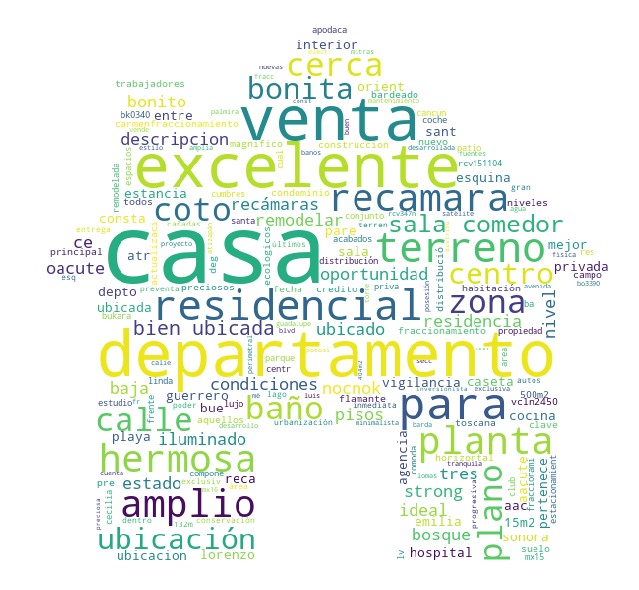

In [24]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(descripcionFiltered))
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Al siguiente word cloud nos pareció oportuno realizarlo con forma de casa. En este, se pueden observar las palabras más recurrentes en las descripciones de los inmuebles. Como era de esperar, las palabras "casa" y "departamento" son las de mayor tamaño. También se puede concluir que la mayoría de los inmuebles están en un "excelente" estado. Otro concepto que se observa en tamaño considerable es lo relacionado con la ubicación del inmueble: se pueden observar las palabras "bien ubicada", "ubicado", "ubicación, entre otras, lo cual suele ser muy tenido en cuenta no solo al momento de la compra de un inmueble sino también en el precio del mismo.